# Term Deposit Prediction - Problem Statement

# **Background and Context:**

Care Bank ran a campaign for term-deposit subscriptions last year for its existing customers that showed a healthy conversion rate of over 12%. The bank is interested in a term deposit subscription because it gets good returns from a term deposit than a savings account as the customer is deprived of the rights to access the money prior to the maturity unless the customer is ready to compensate the bank. Banks can use that money to invest in other markets for better returns.

Now, the bank is planning to launch a new campaign again but this time bank wants to utilize data available from previous campaigns, and also bank wants to automate this process with better target marketing to increase the success ratio with a minimal budget.

You, as a Data scientist at Care bank, have to build a model that will help the marketing department, in the next campaign, to identify the customers who have a higher probability of subscribing to the term deposit. This will increase the success ratio while at the same time reduce the cost of the campaign.

# **Objective:**

To predict which customer is more likely to purchase the newly introduced travel package.


# **Data Description:**

Bank client data:
1. age: Age of customer
2. job: Type of job
3. marital: Marital status of customer
4. education: Eduction of customer
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has a personal loan?
8. balance: balance in the account
9. contact: contact communication type

Related to this campaign:
1. month: last contact month of the year
2. day_of_week: last contact day of the week
3. campaign: number of contacts performed during this campaign and for this client

Related to the previous campaign:
1. pdays: number of days that passed by after the client was last contacted from a previous campaign
2. previous: number of contacts performed before this campaign and for this client
3. poutcome: outcome of the previous marketing campaign
4. Output variable- Target: has the client subscribed to a term deposit? 

Customer interaction data:
1. duration: last contact duration, in seconds


## Overview of the dataset 

**Let's start by importing libraries we need.**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split 
from IPython.display import Image
import xgboost

In [2]:
#Loading dataset
data=pd.read_csv("bank-full.csv")

**View the first 5 rows of the dataset.**

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Check data types and number of non-null values for each column.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- We can see that there are total of 16 columns and 45211 rows in the dataset.
- All age, balance, day, duration, campaign, pdays, and previous are int64 and the rest are object type.


In [7]:
# Checking shape of data
data.shape

(45211, 17)

##### Data has 45211 rows and 17 columns

In [8]:
# Checking the stats for all object columns
cat_cols = data.select_dtypes(include=object).columns.tolist()
data[cat_cols].describe(include = 'all').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


- We can see that all Object columns have max 12 and min 2 number of unique values. poutcome has highest number of unknown values.


- Checking Unique values in each column

In [9]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

- Number of unique values in each column

In [10]:
# Checking the stats for all integer columns
cat_cols = data.select_dtypes(include=int).columns.tolist()
data[cat_cols].describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- The mean and median value for age is around 40 years. Min age is 18 and max is 95
- Balance is highly skewed to the left. Average balance is approx 1400 and median is 448.
- Day values are almost symmetrical
- The duration is slightly skewed to the right.
- The mean and median value for 'campaign' are approx 2.7 and 2.0 respectively.
- pdays is negative for some reason.
- Previous has many zeros.

##### Balance has most number of unique values.

In [11]:
# Checking value counts in each object columns
cat_cols = data.select_dtypes(include=object).columns.tolist()
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)   

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
------------------------------
no     44396
yes      815
Name: default, dtype: int64
------------------------------
yes    25130
no     20081
Name: housing, dtype: int64
------------------------------
no     37967
yes     7244
Name: loan, dtype: int64
------------------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
------------------------------
may    13766
jul     6895
aug     6247
jun     5341
nov     397

- poutcome is unknown in 36959 rows out of 45211 rows.
- There are many unknowns. job, education, contact, poutcome have NaN values.

In [12]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

##### We see no missing values, however there are many 'unknown' values as seen above. 

### Feature Engineering

In [13]:
#Remove all rows for which there are  job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome and Target have 'unknown' values
data.drop(data[(data.job == 'unknown') &  (data.education == 'unknown') & (data.contact == 'unknown') & (data.poutcome == 'unknown')].index, inplace = True)
data.shape

(45157, 17)

In [14]:
# Checking value counts in each columns
cat_cols = data.select_dtypes(include=object).columns.tolist()
for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)   

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           234
Name: job, dtype: int64
------------------------------
married     27176
single      12778
divorced     5203
Name: marital, dtype: int64
------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1803
Name: education, dtype: int64
------------------------------
no     44343
yes      814
Name: default, dtype: int64
------------------------------
yes    25125
no     20032
Name: housing, dtype: int64
------------------------------
no     37913
yes     7244
Name: loan, dtype: int64
------------------------------
cellular     29285
unknown      12966
telephone     2906
Name: contact, dtype: int64
------------------------------
may    13755
jul     6895
aug     6247
jun     5300
nov     396

##### Since poutcome has almost all values as unknown and contact also has very significant unknow count, we can drop these columns without ignificant impact on the results.

In [15]:
#Dropping one column from the dataframe as its not needed for the models
data.drop(columns=['poutcome' ], inplace=True)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


In [16]:
data[(data.pdays < 0)].count()

age          36900
job          36900
marital      36900
education    36900
default      36900
balance      36900
housing      36900
loan         36900
contact      36900
day          36900
month        36900
duration     36900
campaign     36900
pdays        36900
previous     36900
Target       36900
dtype: int64

In [17]:
#replacing negative to positive number in pdays column
data.pdays.replace(-1, 1, inplace=True)
data.pdays.value_counts()

1      36915
182      167
92       147
91       126
183      126
       ...  
404        1
32         1
551        1
670        1
530        1
Name: pdays, Length: 558, dtype: int64

** Missing value treatment and imputation

#### Data Preparation

In [18]:
# Assigning numeric values to job column as blue-collar = 1, management = 2, technician=3, admin.=4, services = 5, retired =6, self-employed=7, entrepreneur=8, unemployed =9, housemaid=10, student =11, unknown =0
data["job"].replace ('blue-collar', 1, inplace=True)
data["job"].replace ('management', 2, inplace=True)
data["job"].replace ('technician', 3, inplace=True)
data["job"].replace ('admin.', 4, inplace=True)
data["job"].replace ('services', 5, inplace=True)
data["job"].replace ('retired', 6, inplace=True)
data["job"].replace ('self-employed', 7, inplace=True)
data["job"].replace ('entrepreneur', 8, inplace=True)
data["job"].replace ('unemployed', 9, inplace=True)
data["job"].replace ('housemaid', 10, inplace=True)
data["job"].replace ('student', 11, inplace=True)
data["job"].replace ('unknown', 0, inplace=True)
print(data["job"].value_counts())

1     9732
2     9458
3     7597
4     5171
5     4154
6     2264
7     1579
8     1487
9     1303
10    1240
11     938
0      234
Name: job, dtype: int64


In [19]:
# Assigning numeric values to marital column as married = 1, single = 2, divorced=3
data["marital"].replace ('married', 1, inplace=True)
data["marital"].replace ('single', 2, inplace=True)
data["marital"].replace ('divorced', 3, inplace=True)
print(data["marital"].value_counts())

1    27176
2    12778
3     5203
Name: marital, dtype: int64


In [20]:
# Assigning numeric values to education column as 'secondary' =1, 'tertiary' = 2, 'primary'=3 'unknown' = 0  
data["education"].replace ('secondary', 1, inplace=True)
data["education"].replace ('tertiary', 2, inplace=True)
data["education"].replace ('primary', 3, inplace=True)
data["education"].replace ('unknown', 0, inplace=True)
print(data["education"].value_counts())

1    23202
2    13301
3     6851
0     1803
Name: education, dtype: int64


In [21]:
# Assigning numeric values to housing column as 'yes' =1, 'no' = 0
data["housing"].replace ('yes', 1, inplace=True)
data["housing"].replace ('no', 0, inplace=True)
print(data["housing"].value_counts())

1    25125
0    20032
Name: housing, dtype: int64


In [22]:
# Assigning numeric values to default column as  'yes' =1, 'no' = 0  
data["default"].replace ('yes', 1, inplace=True)
data["default"].replace ('no', 0, inplace=True)
print(data["default"].value_counts())

0    44343
1      814
Name: default, dtype: int64


In [23]:
# Assigning numeric values to loan column as  'yes' =1, 'no' = 0  
data["loan"].replace ('yes', 1, inplace=True)
data["loan"].replace ('no', 0, inplace=True)
print(data["loan"].value_counts())

0    37913
1     7244
Name: loan, dtype: int64


In [24]:
# Assigning numeric values to contact column as cellular = 1, telephone = 2 , unknown = 3
data["contact"].replace ('cellular', 1, inplace=True)
data["contact"].replace ('telephone', 2, inplace=True)
data["contact"].replace ('unknown', 3, inplace=True)
print(data["contact"].value_counts())

1    29285
3    12966
2     2906
Name: contact, dtype: int64


In [25]:
# Assigning numeric values to education column as 'jan' =1, 'feb' = 2, 'mar'=3 and so on till'dec' = 12  
data["month"].replace ('jan', 1, inplace=True)
data["month"].replace ('feb', 2, inplace=True)
data["month"].replace ('mar', 3, inplace=True)
data["month"].replace ('apr', 4, inplace=True)
data["month"].replace ('may', 5, inplace=True)
data["month"].replace ('jun', 6, inplace=True)
data["month"].replace ('jul', 7, inplace=True)
data["month"].replace ('aug', 8, inplace=True)
data["month"].replace ('sep', 9, inplace=True)
data["month"].replace ('oct', 10, inplace=True)
data["month"].replace ('nov', 11, inplace=True)
data["month"].replace ('dec', 12, inplace=True)
print(data["month"].value_counts())

5     13755
7      6895
8      6247
6      5300
11     3969
4      2932
2      2649
1      1403
10      737
9       579
3       477
12      214
Name: month, dtype: int64


- Target variable cant have binary numbers zero and one that currently it has. Therefore ProdTaken will be modified to have 2 instead of zero. 1 means Yes Product was taken , 2 means No.

In [26]:
# Assigning numeric values to Target column as 'yes' =1, 'no' = 0  

data["Target"].replace ('yes', 1, inplace=True)
data["Target"].replace ('no', 0, inplace=True)
data[['Target']] = data[['Target']].astype('int64')
print(data["Target"].value_counts())

0    39869
1     5288
Name: Target, dtype: int64


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45157 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45157 non-null  int64
 1   job        45157 non-null  int64
 2   marital    45157 non-null  int64
 3   education  45157 non-null  int64
 4   default    45157 non-null  int64
 5   balance    45157 non-null  int64
 6   housing    45157 non-null  int64
 7   loan       45157 non-null  int64
 8   contact    45157 non-null  int64
 9   day        45157 non-null  int64
 10  month      45157 non-null  int64
 11  duration   45157 non-null  int64
 12  campaign   45157 non-null  int64
 13  pdays      45157 non-null  int64
 14  previous   45157 non-null  int64
 15  Target     45157 non-null  int64
dtypes: int64(16)
memory usage: 5.9 MB


***Data is now ready for EDA***

## Exploratory Data Analysis

### Univariate analysis

In [73]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Observations **

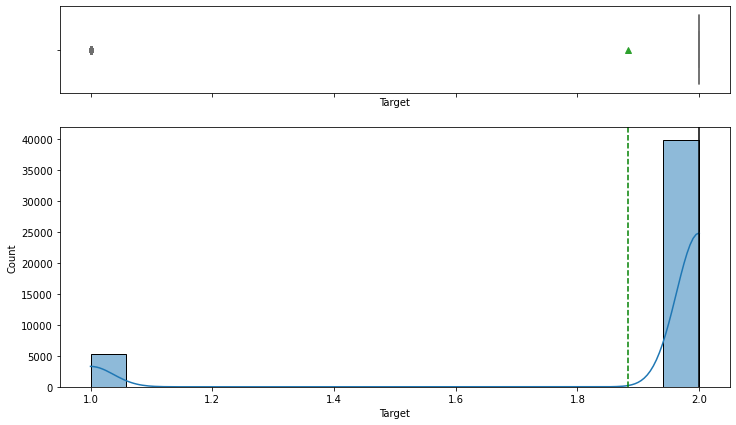

In [27]:
# has the client subscribed to a term deposit? Target column value is 'yes' =1, 'no' = 2  
histogram_boxplot(data, "Target")
plt.show()

- Most customers have not subscribed to Term-Deposit.

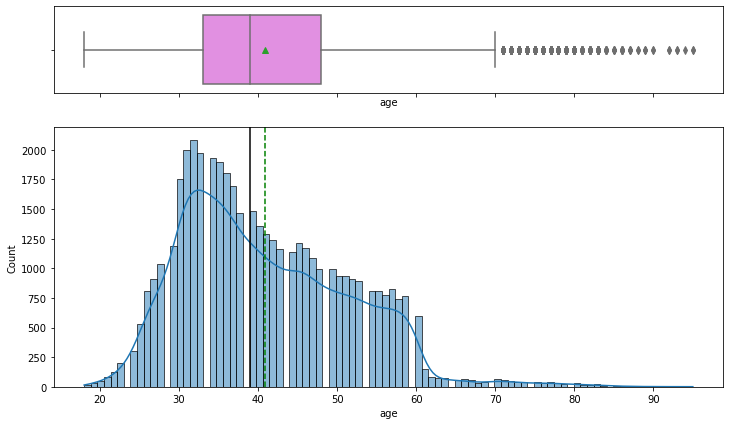

In [403]:
histogram_boxplot(data, "age")
plt.show()

- Most customers are young.

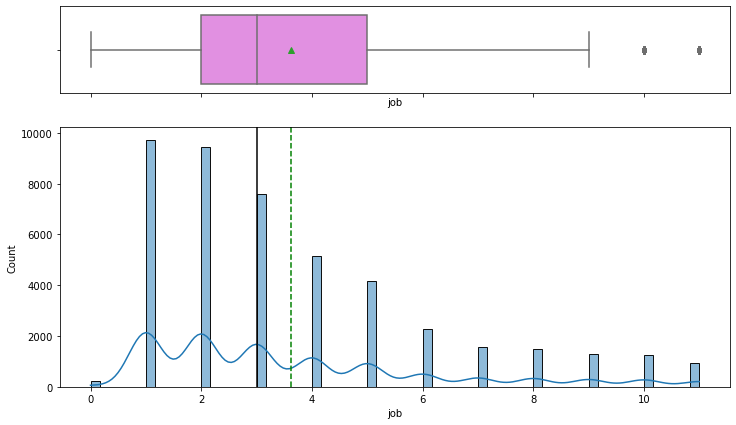

In [404]:
# Blue-collar = 1, management = 2, technician=3, admin.=4, services = 5, retired =6, self-employed=7, entrepreneur=8, unemployed =9, housemaid=10, student =11, unknown =0
histogram_boxplot(data, "job")
plt.show()

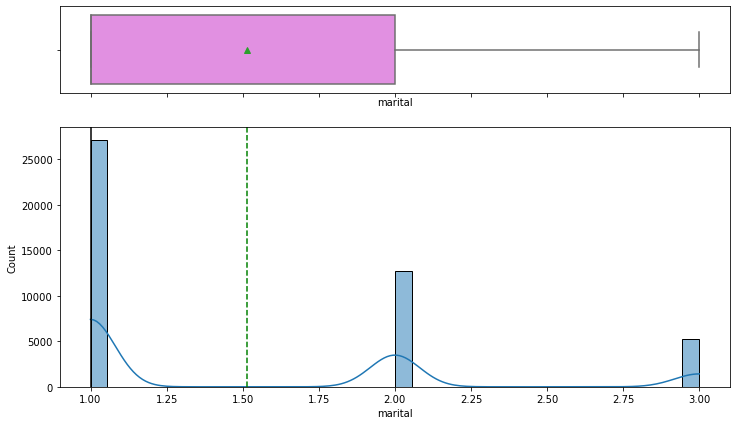

In [405]:
# married = 1, single = 2, divorced=3
histogram_boxplot(data, "marital")
plt.show()

- Most customers are married.

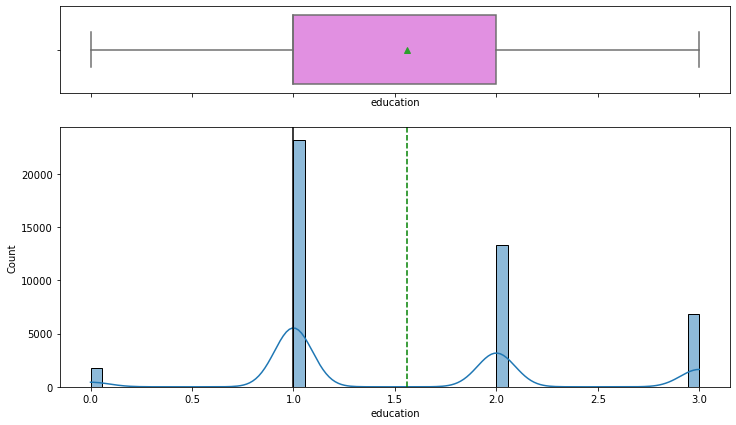

In [406]:
# 'secondary' =1, 'tertiary' = 2, 'primary'=3 'unknown' = 0 
histogram_boxplot(data, "education")
plt.show()

- Most of customers have Secondary class of education.

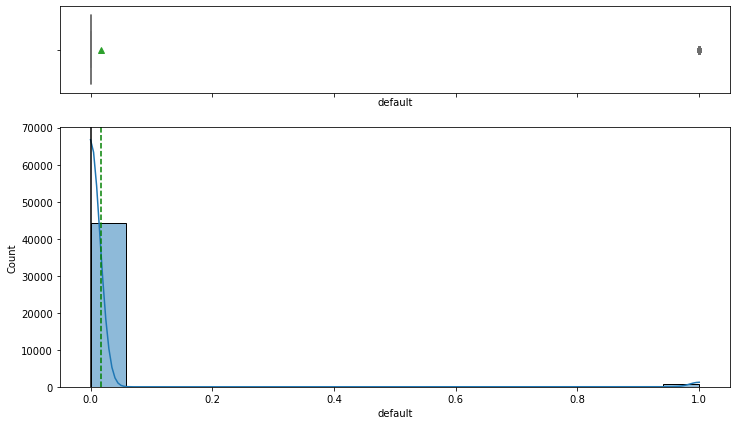

In [407]:
# Assigning numeric values to default column as  'yes' =1, 'no' = 0  
histogram_boxplot(data, "default")
plt.show()

- Most customers are non defaulters.

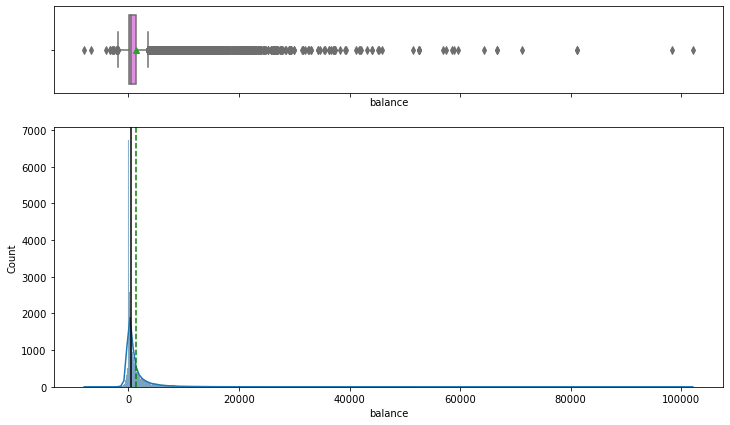

In [408]:
histogram_boxplot(data, "balance")
plt.show()

- Balance has many outliers.

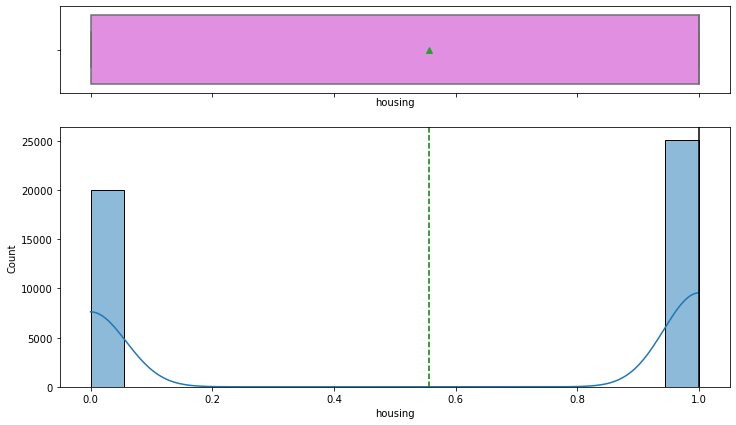

In [409]:
# Has housing loan? 'yes' =1, 'no' = 0
histogram_boxplot(data, "housing")
plt.show()

- Most of customers have housing loan.

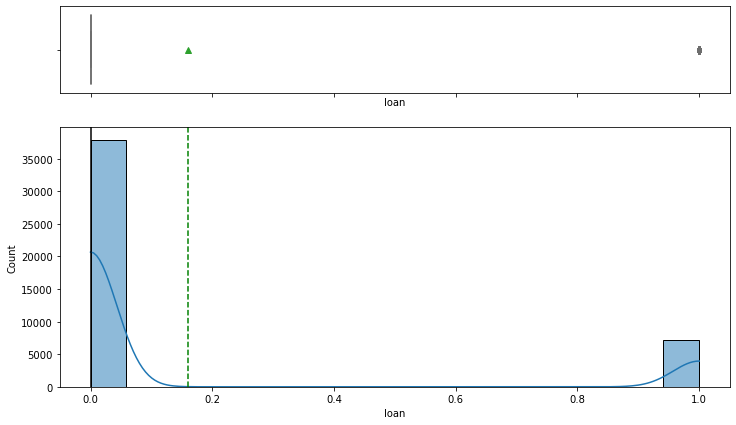

In [410]:
# Has personal Loan? 'yes' =1, 'no' = 0
histogram_boxplot(data, "loan")
plt.show()

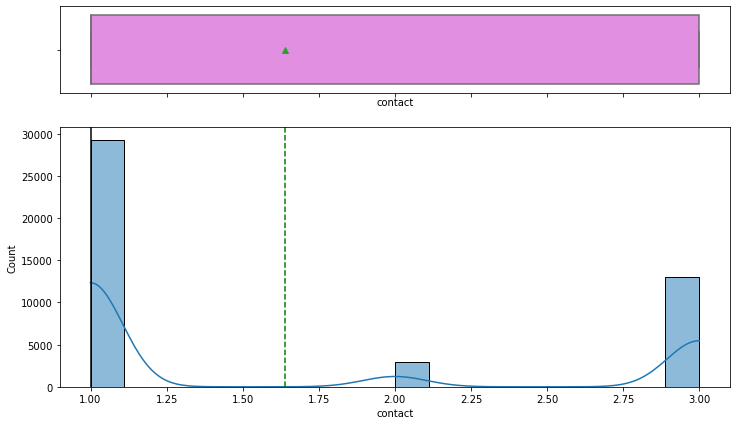

In [27]:
## cellular = 1, telephone = 2 , unknown = 3
histogram_boxplot(data, "contact")
plt.show()

- Most customers were contacted by Cellular

- Most of the customers dont have a personal loan.

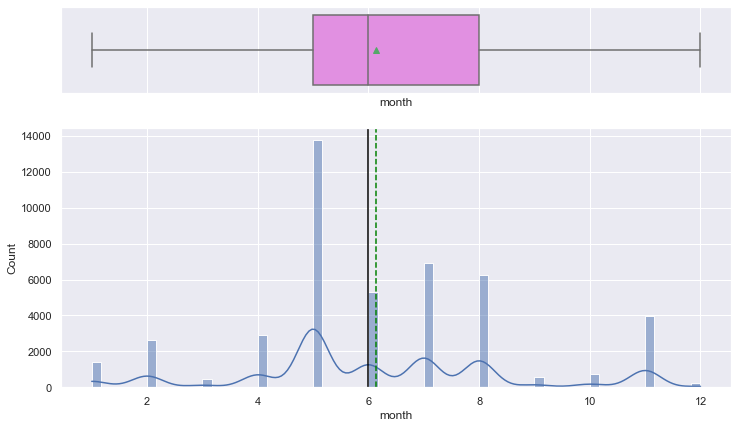

In [43]:
# Month number of the year. 'jan' =1, 'feb' = 2, 'mar'=3 and so on till'dec' = 12  
histogram_boxplot(data,'month')  
plt.show()

- Highest number of last contact made were around in the month of May.

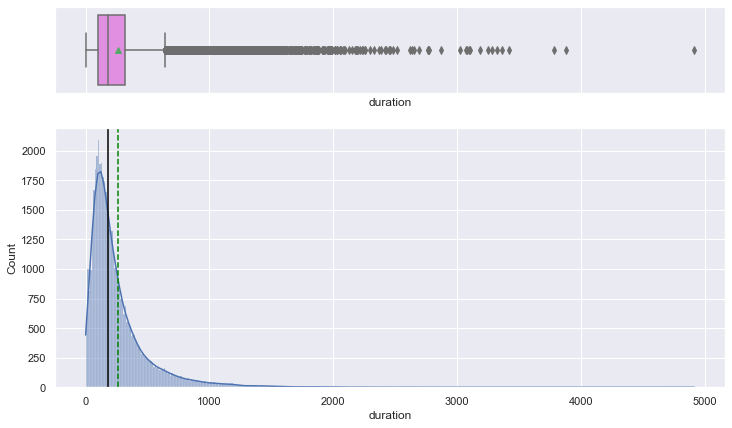

In [42]:
# Duration in seconds
histogram_boxplot(data, "duration")
plt.show()

- Most of the last contacts were made between 0 and 1000 seconds and has many outliers.

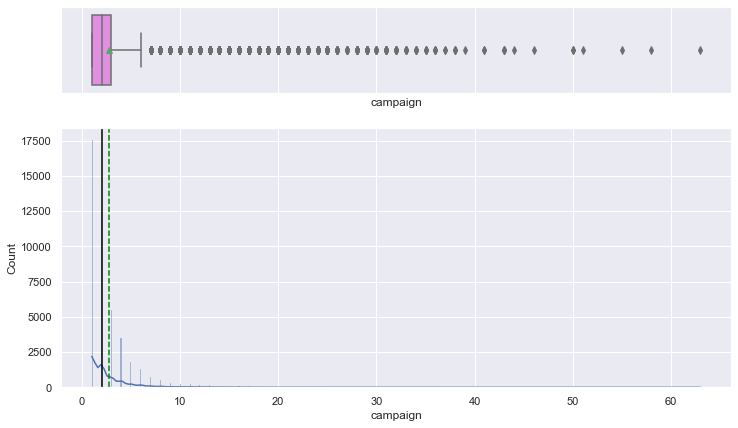

In [41]:
# TypeofContact, "Self Enquiry" =  1 "Company Invited" = 2 Unknown = -1 
histogram_boxplot(data, "campaign")
plt.show()

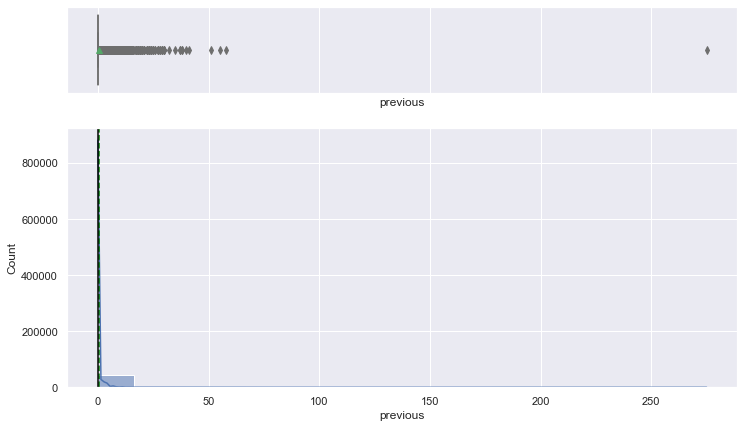

In [46]:
# Number of contacts made during previous campaign for a customer
histogram_boxplot(data,"previous")
plt.show()

- Few number of contacts were made before this campaign for a customer.

**Function to create barplots that indicate percentage for each category**

In [29]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

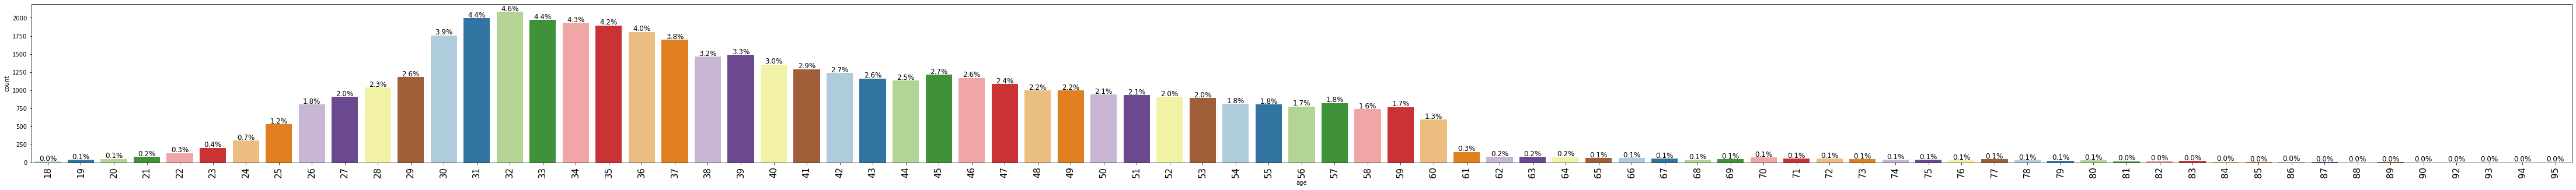

In [28]:
# Double click on the chart to enlarge it.
labeled_barplot(data, "age",perc=True)

- Most customers are between 31 and 33 years of age.

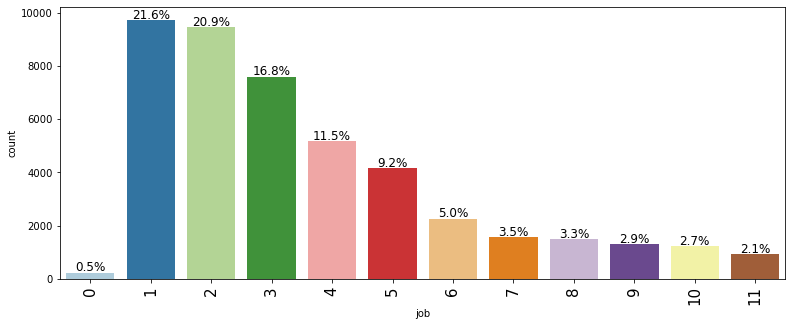

In [421]:
# Assigning numeric values to job column as blue-collar = 1, management = 2, technician=3, admin.=4, services = 5, retired =6, self-employed=7, entrepreneur=8, unemployed =9, housemaid=10, student =11, unknown =0
labeled_barplot(data, "job",perc=True)

- Blue-collar, management and technicians make up for aprox 60%.

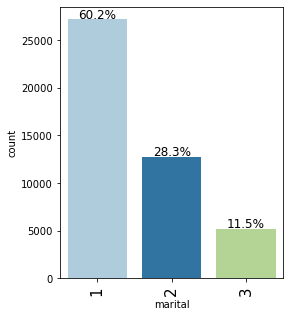

In [422]:
# Assigning numeric values to marital column as married = 1, single = 2, divorced=3
labeled_barplot(data,'marital',perc=True)

- 60.2% are mostly from married.

In [ ]:
# Assigning numeric values to education column as 'secondary' =1, 'tertiary' = 2, 'primary'=3 'unknown' = 0  
labeled_barplot(data,'education',perc=True)

- Each season has approx 24% observations in the data

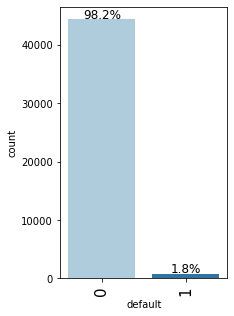

In [424]:
labeled_barplot(data,'default',perc=True)  

- Only 1.8% of customers are defaulters.

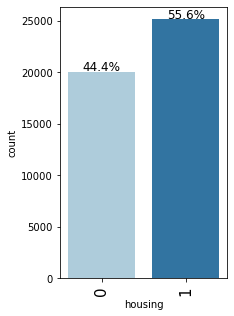

In [426]:
# Assigning numeric values to housing column as 'yes' =1, 'no' = 0
labeled_barplot(data,'housing',perc=True)

- 55.6% of Customers have a housing loan

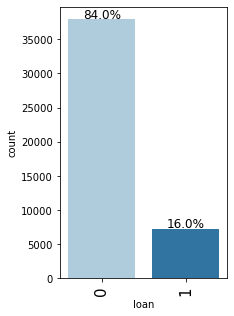

In [427]:
# Assigning numeric values to loan column as 'yes' =1, 'no' = 0
labeled_barplot(data,'loan',perc=True)

- 84% of the customers dont have any personal loan.

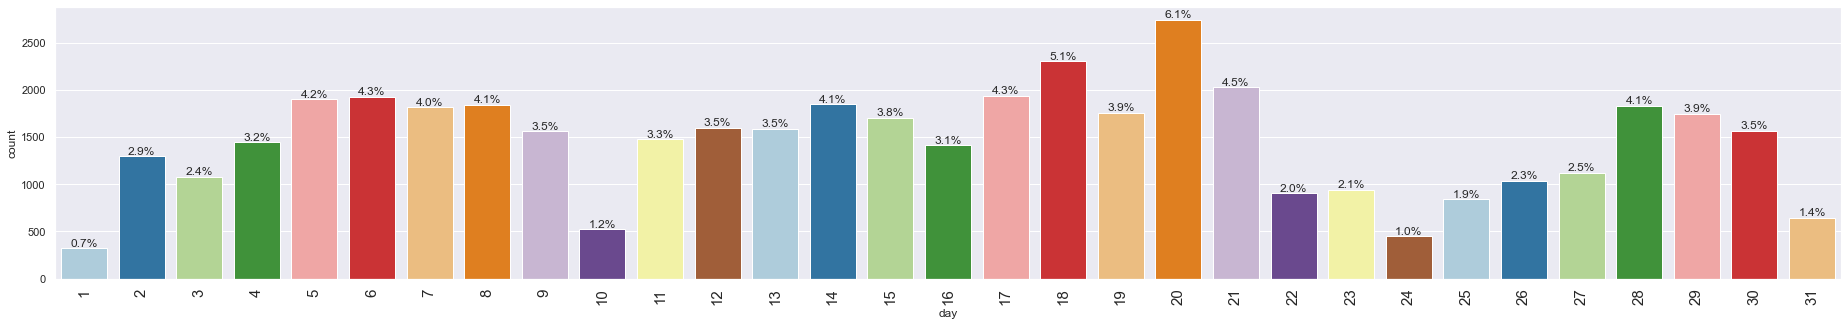

In [36]:
# Day of the month when a customer was last contacted
# Double click on chart to enlarge it
labeled_barplot(data,'day',perc=True)

- 6.1% (which is the highest of all days ) of customers were last contacted around 20th day of the month.

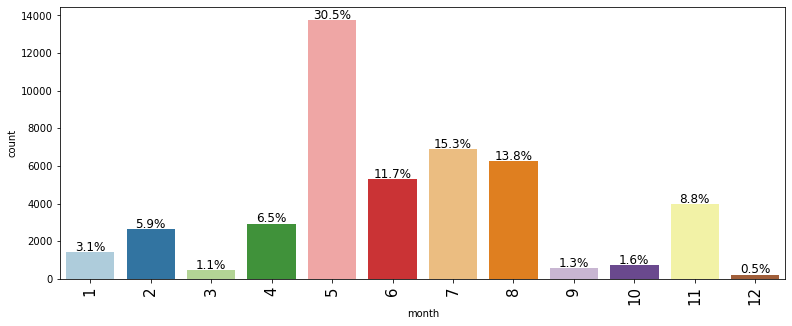

In [430]:
labeled_barplot(data,'month',perc=True)

- 30.5% of customers were contacted in May alone.

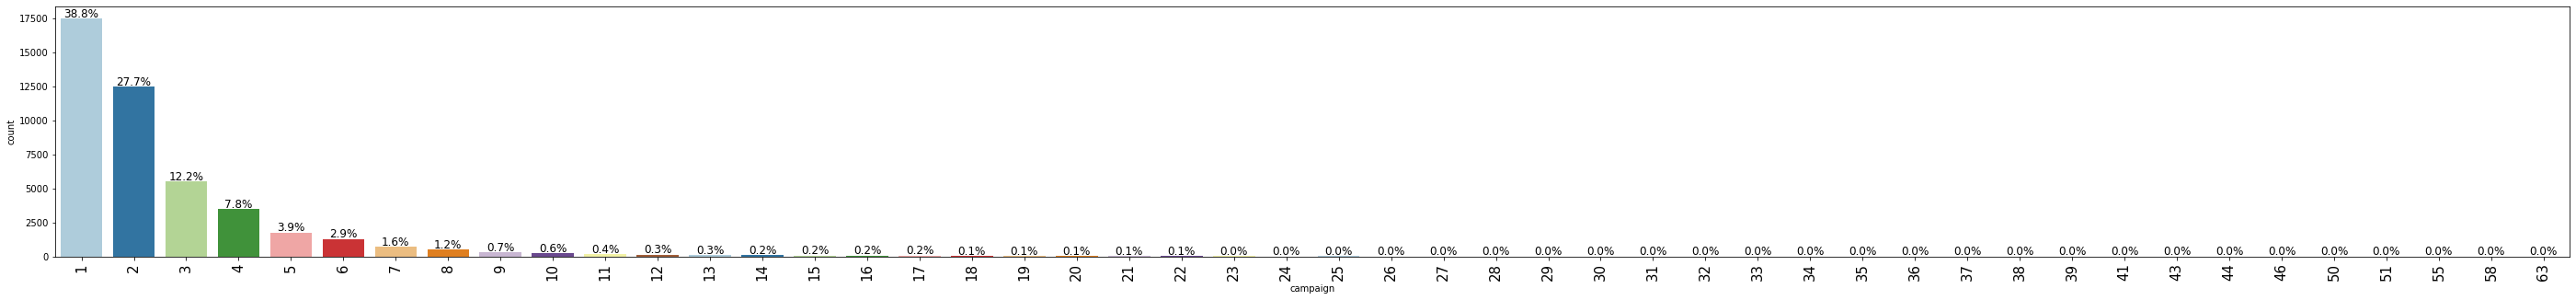

In [432]:
# "Salaried" = 1, "Small Business" = 2, "Large Business" = 3 , and "Free Lancer" = 4
# Double click on chart to enlarge it
labeled_barplot(data,'campaign',perc=True)

- 38.8% single calls were made for this campaign for a customer.

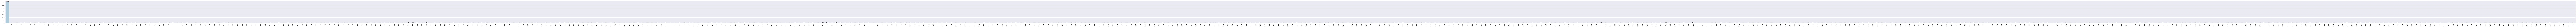

In [35]:
# Last day of the month a customer was last contacted.
labeled_barplot(data,'pdays',perc=True)

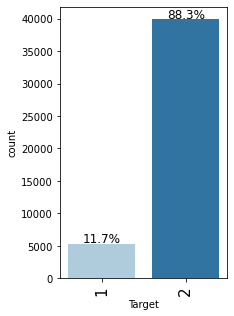

In [436]:
# has the client subscribed to a term deposit? Target yes - 1, no - 2
labeled_barplot(data,'Target',perc=True)

- 88.3% of cusotmers have not subscribed to Term-Deposit.

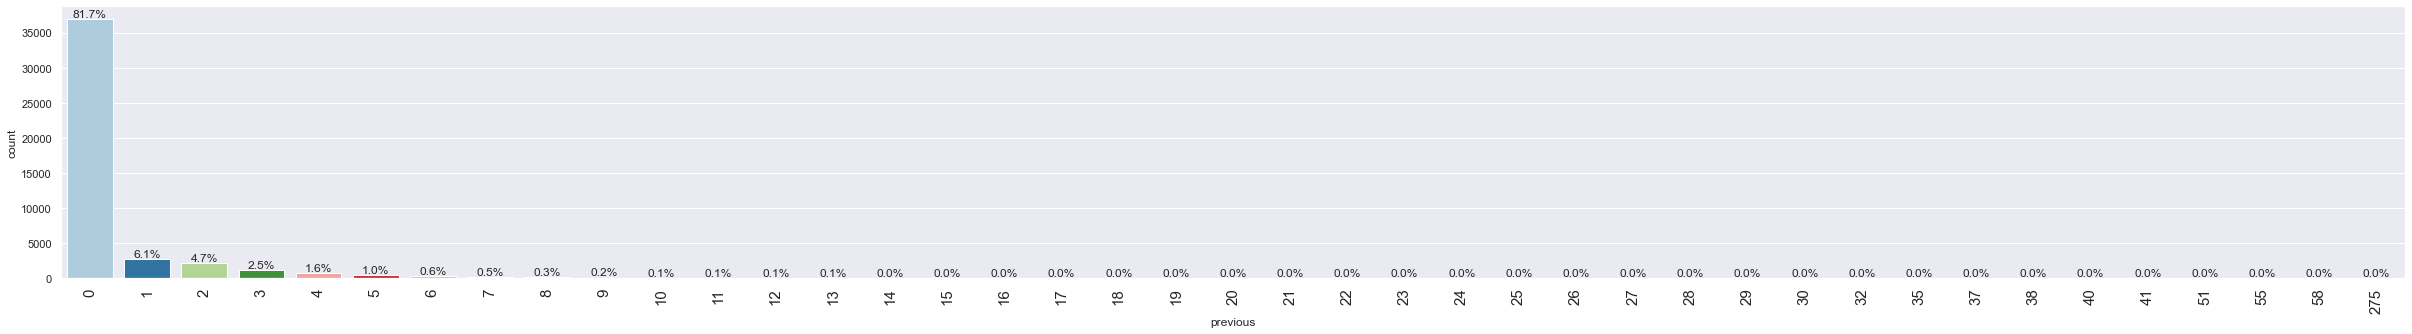

In [39]:
# "previous"  
# Double click on chart to enlarge it.
labeled_barplot(data,'previous',perc=True)

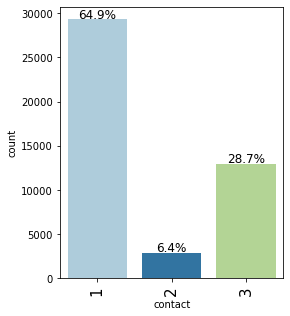

In [31]:
## cellular = 1, telephone = 2 , unknown = 3

labeled_barplot(data,'contact',perc=True)

- 81.7% of the time, no calls were made in previous campaign

### Bivariate analysis

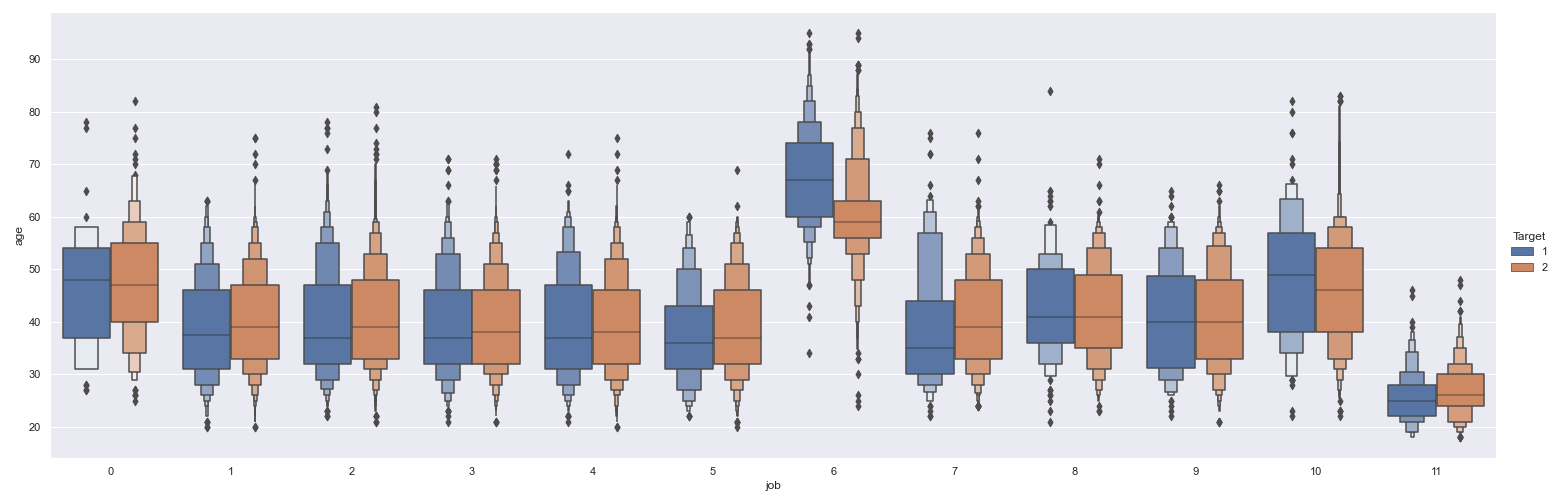

<Figure size 1557.72x504 with 0 Axes>

In [47]:
# Job: Blue-collar = 1, management = 2, technician=3, admin.=4, services = 5, retired =6, self-employed=7, entrepreneur=8, unemployed =9, housemaid=10, student =11, unknown =0
# education : 'secondary' =1, 'tertiary' = 2, 'primary'=3 'unknown' = 0  
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="job", y="age", hue="Target", kind="boxen", data=data, height=7, aspect=3);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

- Most customers who has retired are between 50 to 80 years of age have Term-Deposit 
- Interestingly we can see that retired and housemaids have higher rate of acceptance for the rest of the job classes.

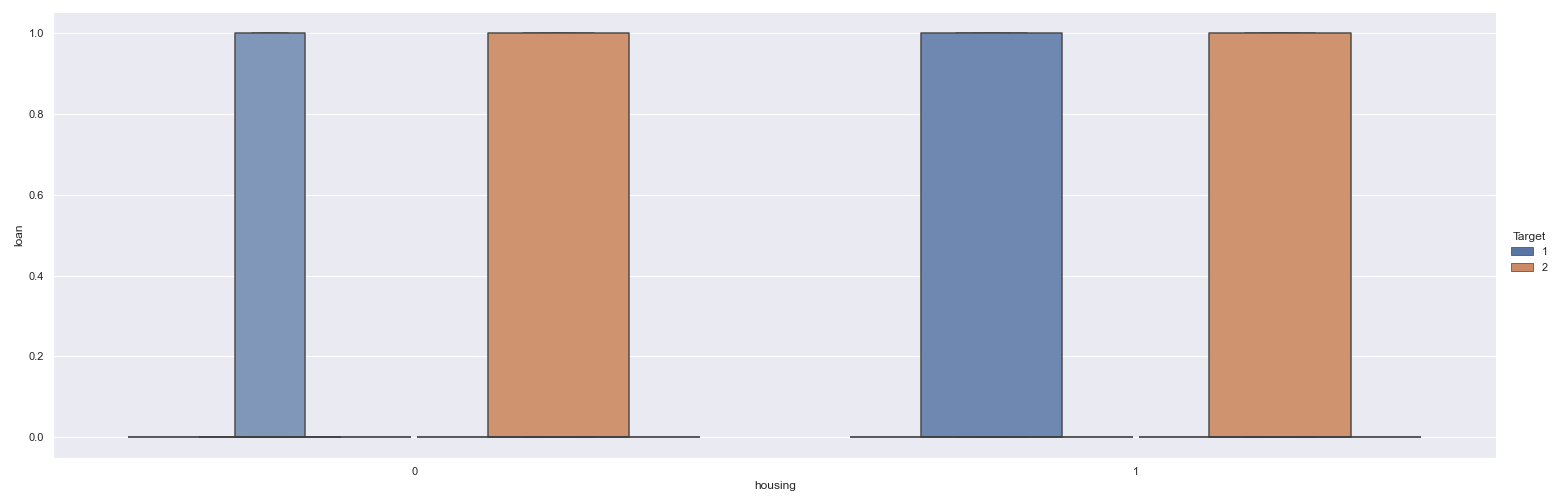

<Figure size 1557.72x504 with 0 Axes>

In [50]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="housing", y="loan", hue="Target", kind="boxen", data=data, height=7, aspect=3);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

- Most of tourists who purchased any product belong to Tier 1 cities followed by Tier 3 cities.

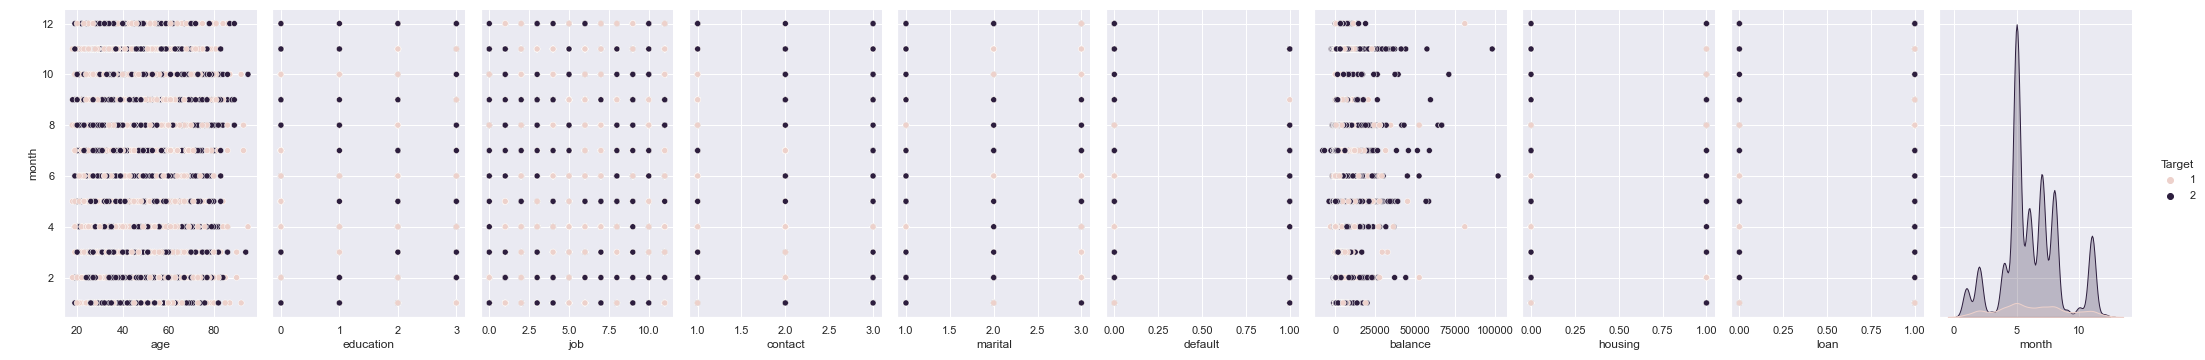

<Figure size 2205.72x360 with 0 Axes>

In [75]:
sns.pairplot(
    data,
    x_vars=["age", "education", "job", "contact", "marital", "default", "balance", "housing", "loan", "month"],
    y_vars=["month"],
    height=5,
    aspect=.6,
    diag_kind='kde',
    hue="Target"
    );
plt.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

- We can see that all Free Lancers belong to City Tier 1 and are between 30 to 40 years of age, and all are single and all are male.

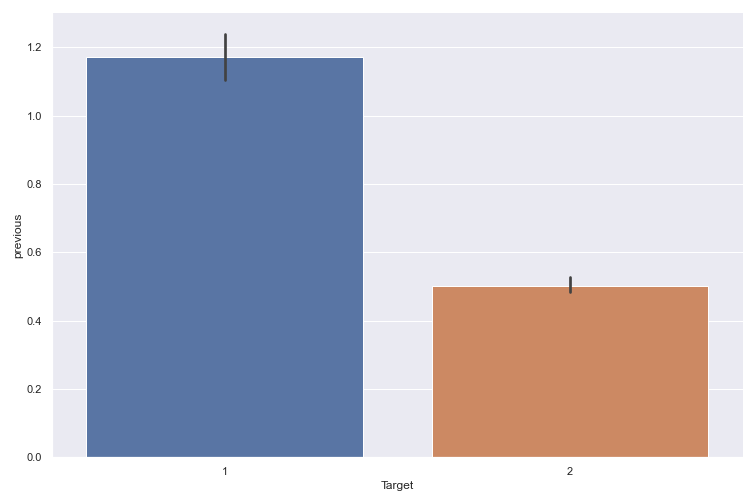

<Figure size 756x504 with 0 Axes>

In [53]:
sns.catplot(x="Target", y="previous", data=data, kind='bar', height=7, aspect=1.5, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

##### We can that between 18 and 23 mid-range, the PitchSatisfactionScore is the highest.

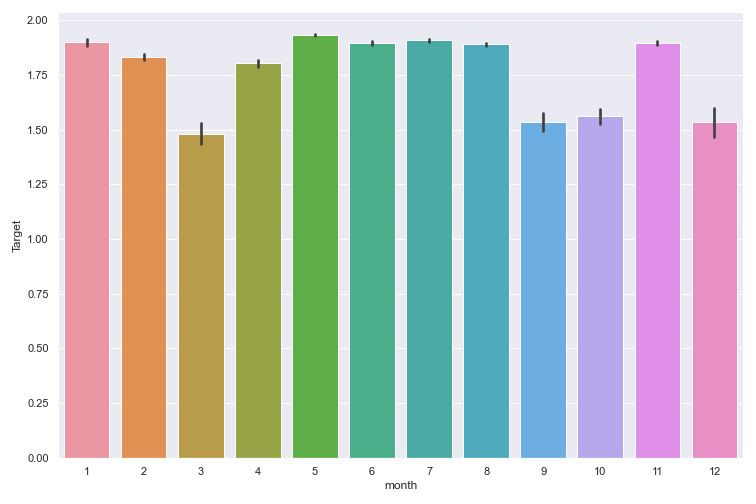

<Figure size 756x504 with 0 Axes>

In [54]:
sns.catplot(x="month", y="Target", data=data, kind='bar', height=7, aspect=1.5, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

##### More Salaried and small business Executives and Managers are traveling.

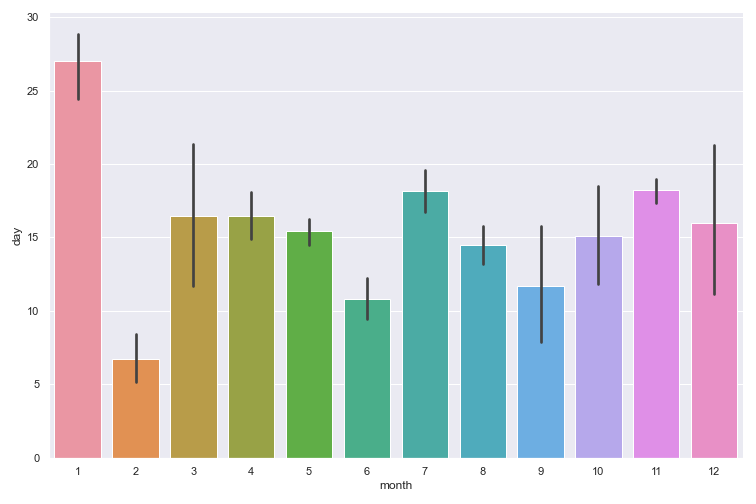

<Figure size 756x504 with 0 Axes>

In [55]:
sns.catplot(x="month", y="day", data=data.sample(1000), kind='bar', height=7, aspect=1.5, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

- We can see the average number of bikes rented is high at 8 AM and 5-6 PM, this can be due to office/school/college timings.
- The average number of bikes rented is very low for night time i.e. 12 AM to 5 AM.

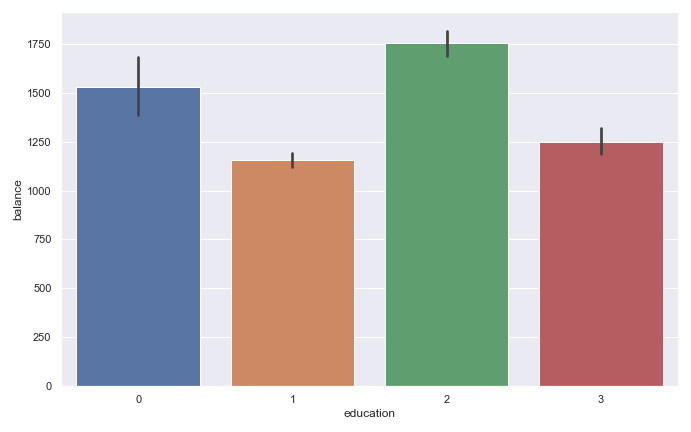

<Figure size 691.2x432 with 0 Axes>

In [56]:
sns.catplot(x="education", y="balance", data=data, kind='bar', height=6, aspect=1.6, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

- The average number of bikes rented is low for months - December, January, February. This can be due to the cold weather in these months.
- The average number of bikes rented is consistently high for months from May to October.

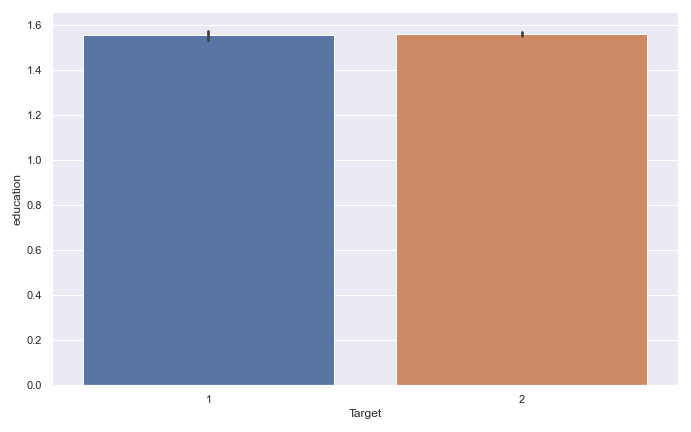

<Figure size 691.2x432 with 0 Axes>

In [57]:
sns.catplot(x="Target", y="education", data=data, kind='bar', height=6, aspect=1.6, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

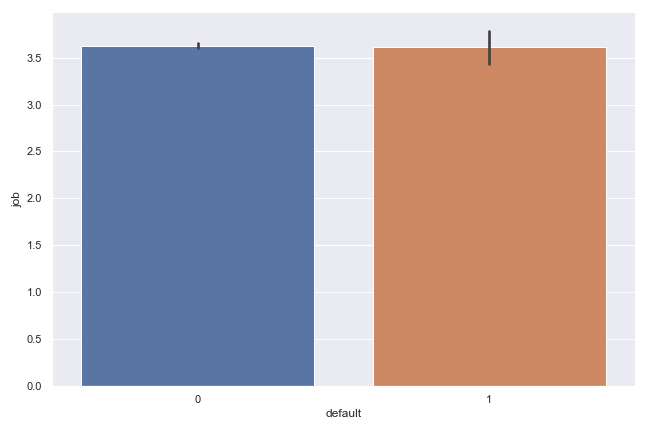

<Figure size 648x432 with 0 Axes>

In [58]:
sns.catplot(x="default", y="job", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

- The products pitched more has higher sale rank.

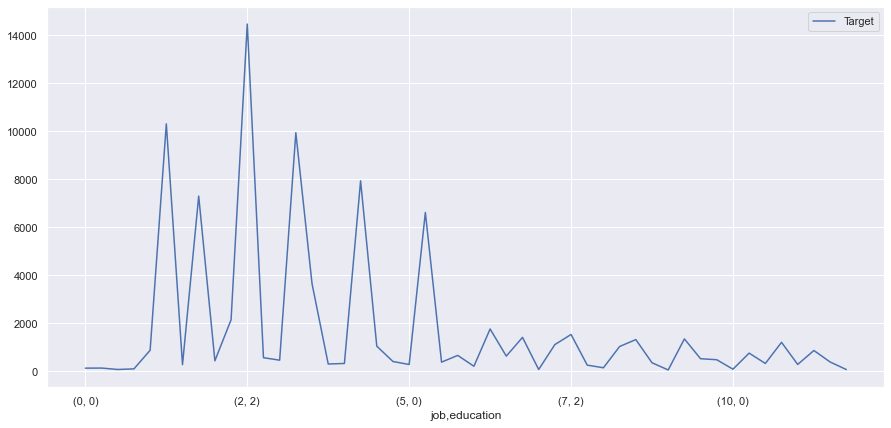

In [79]:
# Job: Blue-collar = 1, management = 2, technician=3, admin.=4, services = 5, retired =6, self-employed=7, entrepreneur=8, unemployed =9, housemaid=10, student =11, unknown =0
# education : 'secondary' =1, 'tertiary' = 2, 'primary'=3 'unknown' = 0  
sns.set(rc={'figure.figsize':(15,7)})
pd.pivot_table(data=data, index=['job', 'education'], values='Target', aggfunc=np.sum).plot();

- We can see that customers having Management Job and Tertiary education is the highest number of customers for the Terms-Deposits.

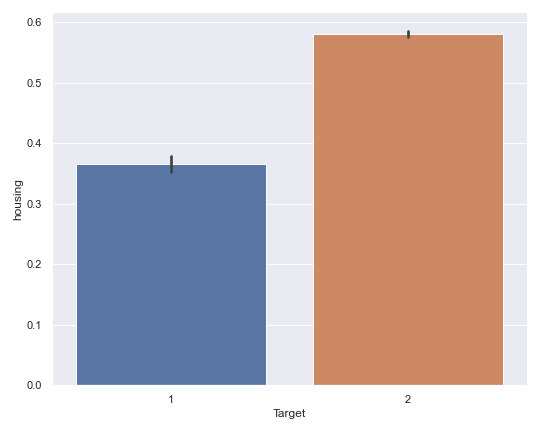

<Figure size 540x432 with 0 Axes>

In [60]:
sns.catplot(x="Target", y='housing', kind='bar', data=data, size=6, aspect=1.25, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

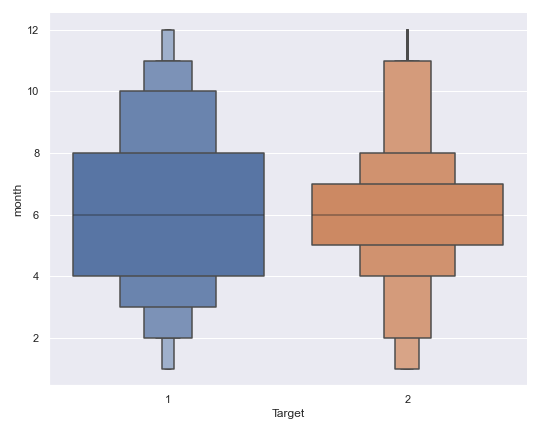

<Figure size 540x432 with 0 Axes>

In [64]:
sns.catplot(x="Target", y='month', kind='boxen', data=data, size=6, aspect=1.25, estimator=np.mean);
plt.savefig("catplot.png")

plt.clf() # Clean parirplot figure from sns 
Image(filename='catplot.png') # Show pairplot as image

##### Most of terms-Deposits were done during April and August.

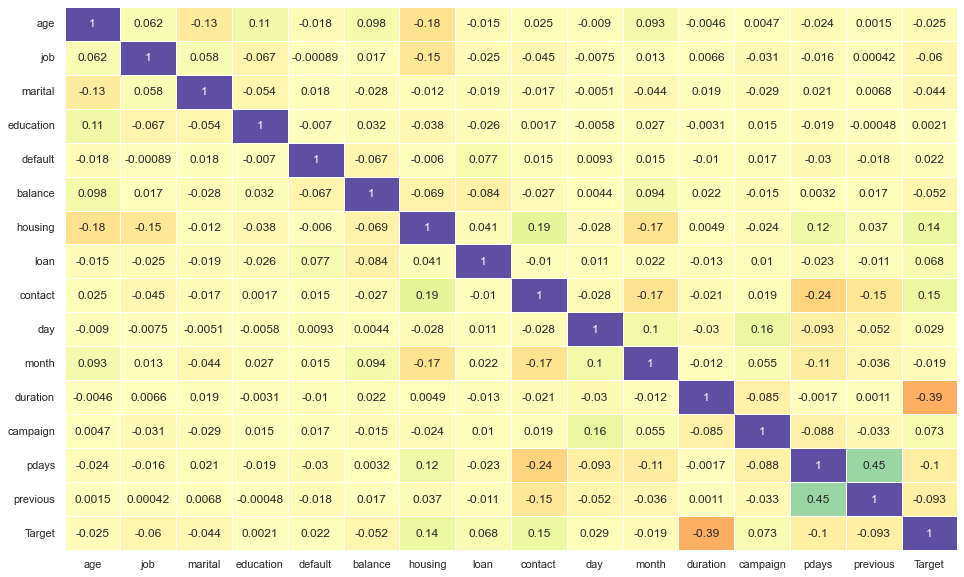

In [62]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()

- Target has stronger reationship with contact and housing loan.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* There were several missing values and outliers in the dataset.

**Data Cleaning:**

* 54 rows whose most column values were 'unknown' were dropped.
* Rest of the unknowns were encoded as Zero
* Two columns not required for the model were dropped.
* All object columns were encoded to numeric values.

**Observations from EDA:**

- Interestingly we can see that retired and housemaids have higher rate of acceptance for the rest of the job classes.
- Most customers have not subscribed to Term-Deposit.
- Customers having Management Job and Tertiary education is the highest number of customers for the Terms-Deposits.

**Actions for data pre-processing:**

* Many values were missing. Many of them was encoded and many were imputed and for few dummies were created.
* Data type was converted to numeric.

## Split the dataset

In [28]:
# Separating features and the target column
X = data.drop('Target', axis=1)
y = data['Target']

In [29]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31609, 15), (13548, 15), (31609,), (13548,))

##### We have 31609 observations in the train set and 13548 observations in the test set.

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- We will use several models, including bagging with Logistics Regression as base estimator, and many Boosting models.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

##### All columns are integer or float and are ready for Modeling

In [31]:
# function to compute performance metrics
def adj_r2_score(predictors, targets, predictions):
    r2 = metrics.r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: Classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = metrics.r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(metrics.mean_squared_error(target, pred))  # to compute RMSE
    mae = metrics.mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [32]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [33]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Bagging Model

### Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [32]:
base_cls = DecisionTreeClassifier()
seed=8
num_trees = 500
bagging_lr=BaggingClassifier(base_estimator=base_cls, n_estimators = num_trees, random_state=seed)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=8)

#### Accuracy of each model is best for Bagging improves the estimate of one by combining the estimates of many. 

In [33]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_score=get_metrics_score(bagging_lr)

Accuracy on training set :  1.0
Accuracy on test set :  0.9019781517567168
Recall on training set :  1.0
Recall on test set :  0.4870825456836799
Precision on training set :  1.0
Precision on test set :  0.6006216006216006
F1 on training set :  1.0
F1 on test set :  0.5379262352122478


In [34]:
bagging_model_train_perf = model_performance_classification(bagging_lr, X_train, y_train)
print("Training performance \n", bagging_model_train_perf)

Training performance 
    RMSE  MAE  R-squared  Adj. R-squared  MAPE
0   0.0  0.0        1.0             1.0   0.0


In [35]:
bagging_model_test_perf = model_performance_classification(bagging_lr, X_test, y_test)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.313084  0.098022   0.052174        0.051123  7.905226


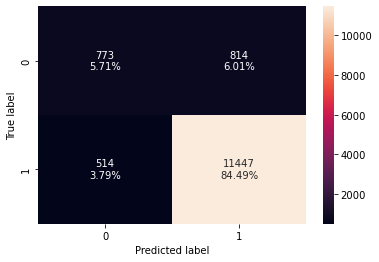

In [36]:
confusion_matrix_sklearn(bagging_lr,X_test,y_test)

### Insights
- Bagging classifier with logistic regression as base_estimator is overfitting the data .

## Boosting Models

### AdaBoost Classifier

In [37]:
#Fitting the model
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [38]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8956626277326079
Accuracy on test set :  0.8872896368467671
Recall on training set :  0.33720616049716295
Recall on test set :  0.2980466288594833
Precision on training set :  0.5962732919254659
Precision on test set :  0.5338600451467269
F1 on training set :  0.4307904729030031
F1 on test set :  0.38253133845531745


In [42]:
bagging_model_test_perf = model_performance_classification(abc, X_test, y_test)
print("Testing performance \n", bagging_model_test_perf)

Testing performance 
        RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.335724  0.11271  -0.089858       -0.091066  9.746826


- AdaBoost is generalizing well but it is giving poor performance, in terms of MAPE score as well as RMSE. Also  R2 score is negative. 

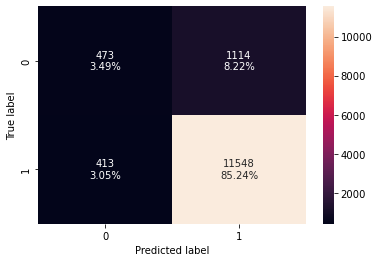

In [40]:
confusion_matrix_sklearn(abc,X_test,y_test)

### Hyperparameter Tuning

In [41]:
# Choose the type of Classifier. 
ab_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10), 
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ab_tuned.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=90, random_state=1)

In [45]:
ab_classifier_model_tuned_train_perf=ab_tuned.score(X_train, y_train)
ab_classifier_model_tuned_test_perf=ab_tuned.score(X_test, y_test)
print("Tuned Training Score", ab_tuned.score(X_train, y_train))
print("Tuned Testing Score", ab_tuned.score(X_test, y_test))

Tuned Training Score 0.8981935524692335
Tuned Testing Score 0.8908325952170062


#### ADA Boosting F-measure can provide a balance between precision and recall, and it is preferred over accuracy where data is unbalanced.

In [46]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(ab_tuned)

Accuracy on training set :  0.8981935524692335
Accuracy on test set :  0.8908325952170062
Recall on training set :  0.3442312888408538
Recall on test set :  0.30434782608695654
Precision on training set :  0.6169491525423729
Precision on test set :  0.5629370629370629
F1 on training set :  0.44190079778009017
F1 on test set :  0.3950920245398773


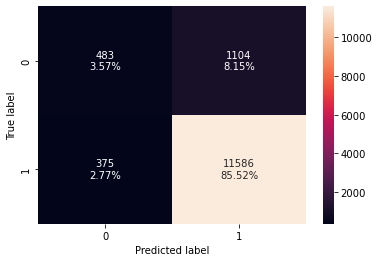

In [47]:
#Creating confusion matrix
confusion_matrix_sklearn(ab_tuned,X_test,y_test)

In [48]:
ab_classifier_model_tuned_train_perf = model_performance_classification(ab_tuned, X_train, y_train)
print("Training performance \n", ab_classifier_model_tuned_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.319071  0.101806   0.015198         0.01473  8.929419


In [49]:
ab_classifier_model_tuned_test_perf = model_performance_classification(ab_tuned, X_test, y_test)
print("Testing performance \n", ab_classifier_model_tuned_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.330405  0.109167  -0.055599       -0.056769  9.532772


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [50]:
# importance of features in the tree building

print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                Imp
duration   0.288889
month      0.244444
pdays      0.122222
day        0.077778
balance    0.044444
campaign   0.044444
age        0.033333
job        0.033333
marital    0.022222
education  0.022222
housing    0.022222
contact    0.022222
loan       0.011111
previous   0.011111
default    0.000000


##### duration, pdays, housing are top 3 important features.

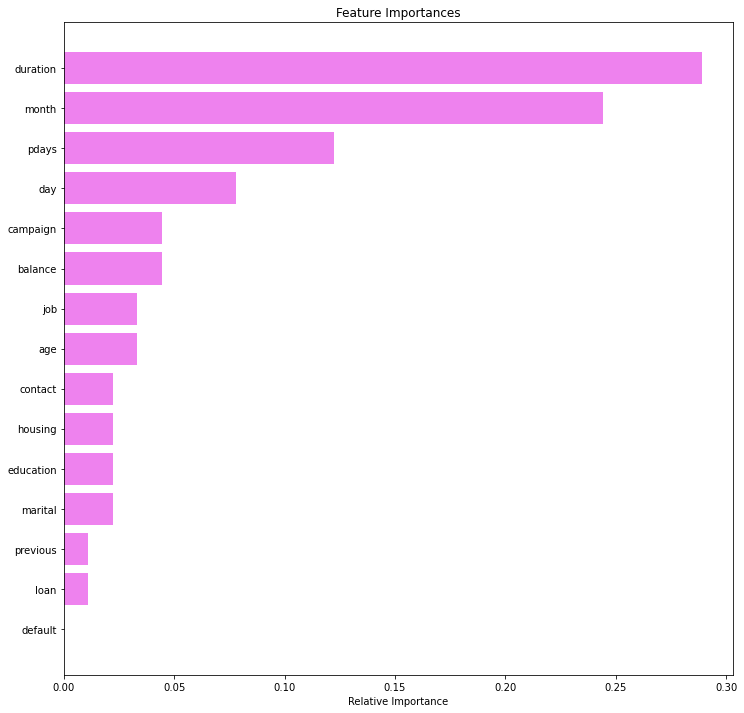

In [51]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In the tuned AdaBoost, duration, month, pdays are top 3 important features..

### Gradient Boosting Classifier

In [52]:
gb_estimator = GradientBoostingClassifier(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [53]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gb_estimator)

Accuracy on training set :  0.9077794299092031
Accuracy on test set :  0.8991733097136109
Recall on training set :  0.40853823291002433
Recall on test set :  0.3610586011342155
Precision on training set :  0.675603217158177
Precision on test set :  0.6194594594594595
F1 on training set :  0.5091766290621317
F1 on test set :  0.4562101910828026


In [54]:
gbc_classifier_model_train_perf = model_performance_classification(gb_estimator, X_train, y_train)
print("Training performance \n", gbc_classifier_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared     MAPE
0  0.303678  0.092221   0.107925        0.107501  8.07365


In [55]:
gbc_classifier_model_test_perf = model_performance_classification(gb_estimator, X_test, y_test)
print("Test performance \n", gbc_classifier_model_test_perf)

Tr performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.317532  0.100827   0.025052        0.023971  8.783584


- Gradient boosting is generalizing well and giving decent results MAPE is still very high, and R2 score is very low.

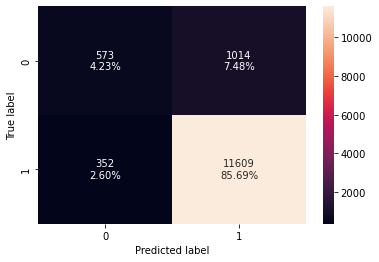

In [56]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_estimator,X_test,y_test)

### Hyperparameter Tuning

In [ ]:
# Choose the Gradient Boosting Classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
     'n_estimators': np.arange(50,200,25), 
     'subsample':[0.7,0.8,0.9,1],
     'max_features':[0.7,0.8,0.9,1],
     'max_depth':[3,5,7,10]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

#### Accuracy score is best because this model has to increase the accuracy with each tree based on the accuracy of previous weak learners by putting more weight on in-accurate trees.

In [57]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9276471890917144
Accuracy on test set :  0.9012400354295838
Recall on training set :  0.5476898135639017
Recall on test set :  0.4190296156269691
Precision on training set :  0.7678030303030303
Precision on test set :  0.6151711378353376
F1 on training set :  0.6393313357514588
F1 on test set :  0.4985007496251873


In [58]:
gbc_classifier_tuned_train_model_perf = model_performance_classification(gbc_tuned, X_train, y_train)
print("Training performance \n",gbc_classifier_tuned_train_model_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.268985  0.072353   0.300111        0.299801  6.265621


In [59]:
gbc_classifier_model_tuned_test_perf = model_performance_classification(gbc_tuned, X_test, y_test)
print("Test performance \n",gbc_classifier_model_tuned_test_perf)

Test performance 
        RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.314261  0.09876   0.045036        0.044048  8.340714


- We can see that the model has improved significantly in terms of r2 score and RMSE.
- The r2 score has increased by approx 46% on the test data.
- RMSE has decreased .

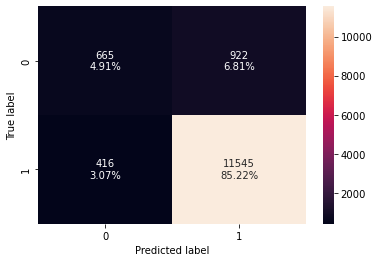

In [60]:
#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

In [61]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(gbc_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                Imp
duration   0.443645
month      0.125133
pdays      0.111506
housing    0.074909
day        0.066175
age        0.065727
balance    0.036854
previous   0.029141
job        0.012627
campaign   0.010976
education  0.008081
marital    0.007807
loan       0.006770
default    0.000650


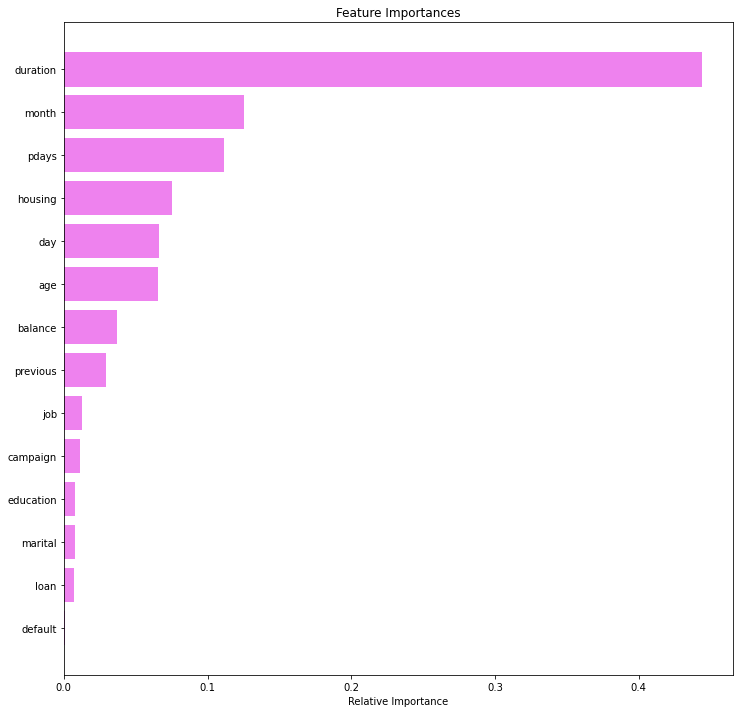

In [62]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In the tuned Gradient Boost, duration, month, pdays, housing, day and age are important features in this order.

### XGBoost Classifier

In [38]:
xgb = xgboost.XGBClassifier(random_state=1 , eval_metric='logloss', tree_method='auto')

#### Classification models use logloss metric. Log loss, short for logarithmic loss is a loss function for classification that quantifies the price paid for the inaccuracy of predictions in classification problems. Log loss penalizes false classifications by taking into account the probability of classification. 

In [39]:
#xgb = XGBClassifier(random_state=1)
xgb_estimator = xgb.fit(X_train,y_train)

In [40]:
xgb_estimator_model_train_perf = model_performance_classification(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.211579  0.044766   0.566969        0.566763   inf


In [41]:
xgb_estimator_model_test_perf = model_performance_classification(xgb_estimator, X_test, y_test)
print("Training performance \n",xgb_estimator_model_test_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.307614  0.094627   0.085005        0.083991   inf


- XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss', tree_method='auto' )

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150], 
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.accuracy_score)

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)

In [ ]:
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [ ]:
# Fit the best algorithm to the data. 
xgb_tuned.fit(X_test, y_test)

In [ ]:
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7, .6]}

In [ ]:
xgbr = XGBClassifier(seed = 20, tree_method='gpu_hist')

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [ ]:
# Run the grid search
grid_obj = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring=scorer, 
                   verbose=1)

In [ ]:
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [ ]:
# Fit the best algorithm to the data. 
xgb_tuned.fit(X_train, y_train)

In [ ]:
print("Best parameters:", grid_obj.best_params_)
print("Lowest RMSE: ", (grid_obj.best_score_)**(1/2.0))

In [ ]:
print("Best parameters:", grid_obj.best_params_)
print("Lowest RMSE: ", (grid_obj.best_score_)**(1/2.0))

In [ ]:
xgb_tuned_model_train_perf = model_performance_classification(xgb_tuned, X_train,y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

In [ ]:
xgb_tuned_model_test_perf = model_performance_classification(xgb_tuned, X_test,y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

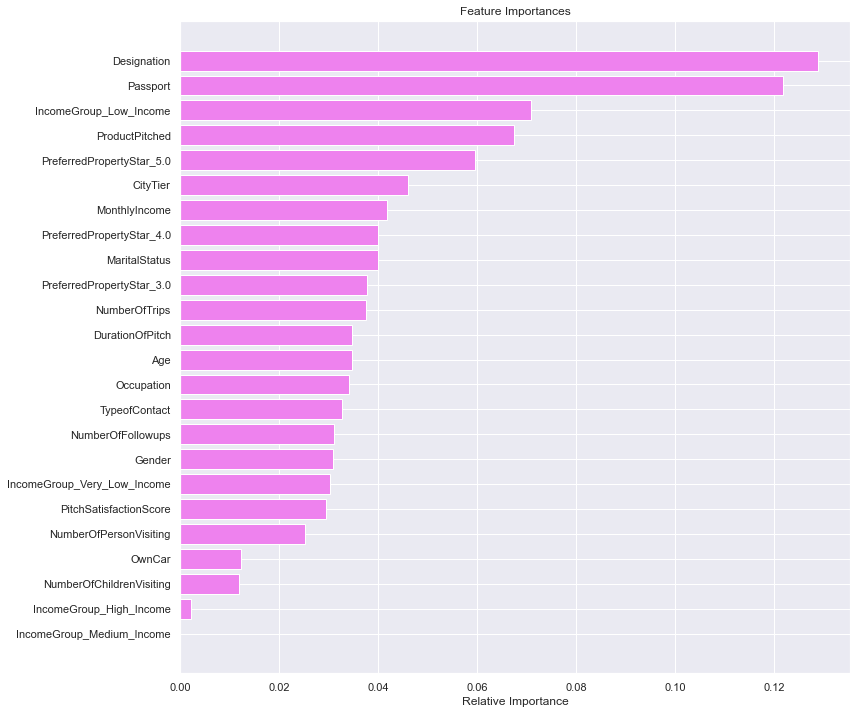

In [419]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In the tuned XGBoost, Passport, ProductPitch, MaritalStatus, Income, CityTierare important features in this order.

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [420]:
estimators=[('Decision Tree', dtree_tuned), ('Random Forest', rf_tuned), ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [421]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=6,
                                                     max_leaf_nodes=40,
                                                     min_impurity_decrease=0.001,
                                                     min_samples_leaf=16,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_depth=30,
                                                     max_features=None,
                                                     n_estimators=140,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_features=0.7,
                                                         n_estimators=50,...
                              

In [422]:
stacking_estimator_model_train_perf = model_performance_classification(stacking_estimator, X_train,y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.08913  0.040266   0.948025        0.947657  2.648404


In [423]:
stacking_estimator_model_test_perf = model_performance_classification(stacking_estimator, X_test,y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.249719  0.113343   0.591948        0.585152  8.429022


## Comparing all models

In [426]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_classifier_model_test_perf.T, ab_classifier_model_tuned_test_perf.T, 
    gbc_classifier_model_test_perf.T, gbc_classifier_model_tuned_test_perf.T, 
    xgb_estimator_model_test_perf.T, 
    xgb_tuned_model_test_perf.T, stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "Xtreme Gradient Boost Estimator",
    "Xtreme Gradient Boost Tuned",
    "Stacking Classifier"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,Xtreme Gradient Boost Estimator,Xtreme Gradient Boost Tuned,Stacking Classifier
RMSE,0.324111,0.353662,0.239805,0.239576,0.360164,0.350845,0.321463,0.330626,0.254604,0.217775,0.249719
MAE,0.105048,0.239325,0.147653,0.148080,0.250646,0.258240,0.220118,0.229851,0.154781,0.118734,0.113343
R-squared,0.312617,0.181554,0.623706,0.624424,0.151184,0.194540,0.323801,0.284706,0.575829,0.689668,0.591948
Adj. R-squared,0.301169,0.167923,0.617439,0.618169,0.137047,0.181125,0.312539,0.272793,0.568765,0.684499,0.585152
MAPE,8.083220,18.217559,11.144270,11.146463,18.891123,19.254556,16.605903,17.383485,11.215960,8.702072,8.429022


- Lower RMSE between .25 to .5 is desirable
- Lower values of MAE, MSE, RMSE implies higher accuracy and high value of R Square is considered desirable. Adjsuted RE Square value above .40 is a good indication.
- Xtreme Gradient Boost Tuned seems to be the best fit.

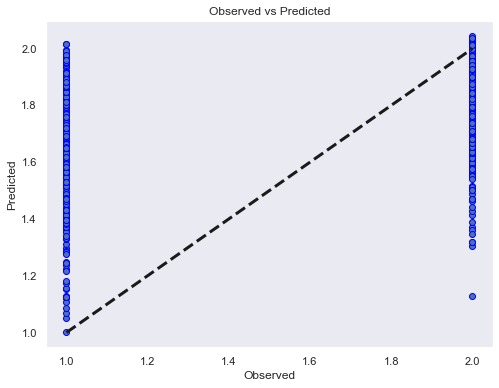

In [428]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gbc_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot. 

##  Business Recommendations

- We can use this predictive model for any demographic and company business parameters (which we know in advance) and can predict the count of the Tour Products to be sold. The ability to predict the number of products tourists are more likely to buy and allow the company to focu on important parameters and keep any guess work out. This will help the company manage its resources more efficiently and cost-effectively.
- More products can be sold to high income groups and single tourists or a family with children having passport who already had few tript lving in City Tier 1 area. Those cutomers can be highly pitched of the basis products to gain more traction.
- Company can provide offers or coupons like a yearly subscription to compensate for the low count on work days or busy days. The data was incomplete as the season data was missing. Seasons are important for tourists and travellers to decide whether they will travel for pleasure.